In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from scipy import misc
from filesSelector import *
from skimage import io
from scipy.misc import imresize
from scipy import signal
import exifread
import os
import json


In [3]:
def get_circ_centers(file_path):
    # assuming i get 4 points for dna spot (rects)
    p = np.zeros((2))
    points=np.zeros((0,2))
    colors = []
    xcol = 0
    ccol = 3
    with open(file_path,'r') as f:
        lines = f.readlines()
        for i,h in enumerate(lines[0].split(',')):
            if h == "Center X":
                xcol = i
            elif h == "Color":
                ccol = i
        for i,line in enumerate(lines[1:]):
            l = line.split(',')
            p[:] = np.array([float(l[xcol])*scale,float(l[xcol+1])*scale])-marker_pos[:]
            if minus_abs_y:
                p[1] = -np.abs(p[1])
            if abs_y:
                p[1] = np.abs(p[1])
            points = np.append(points,np.reshape(p,(1,2)),axis=0)
            colors.append(l[ccol].rstrip())
    return points,colors
            
def add_point(file,pos):
    file.write('    <point>\n')
    file.write('        <x>'+str(int(pos[0]))+'</x>\n')
    file.write('        <y>'+str(int(pos[1]))+'</y>\n')
    file.write('        <z>0</z>\n')
    file.write('        <solution>'+solution+'</solution>\n')
    file.write('        <duration>'+duration+'</duration>\n')
    file.write('    </point>\n')

def header(file):
    file.write('<?xml version="1.0" encoding="utf-8" standalone="no"?>\n')
    file.write('<pattern>\n')
    file.write('    <xmultiplier>1.00</xmultiplier>\n')
    file.write('    <ymultiplier>1.00</ymultiplier>\n')
    file.write('    <featurewidth>50.00</featurewidth>\n')
    file.write('    <gridspacing>'+str(grid_spacing)+'</gridspacing>\n')
    file.write('    <continuous></continuous>\n')
    file.write('    <canvaswidth>'+str(canvaswidth)+'</canvaswidth>\n')
    file.write('    <canvasheight>'+str(canvasheight)+'</canvasheight>\n')
    file.write('    <solutionlayer>\n')
    file.write('        <solutionname>'+solution+'</solutionname>\n')
    file.write('        <solutionlayercolorred>0.80</solutionlayercolorred>\n')
    file.write('        <solutionlayercolorgreen>0.00</solutionlayercolorgreen>\n')
    file.write('        <solutionlayercolorblue>0.00</solutionlayercolorblue>\n')
    file.write('    </solutionlayer>\n')

def footer(file):
    file.write('</pattern>')


def writefile(file_path,out_file):
    points,colors = get_circ_centers(file_path)
    # plot
    for point,color in zip(points,colors):
        plt.scatter(point[0],point[1],color=color[0])#,label=file_path.split('/')[-1]+'_'+color)
    unique_colors = set(colors)
    plt.scatter(0,0,marker='o')
    plt.axis('equal')
    plt.savefig(file_path[:-4]+'.png')
    
    for c in unique_colors:
        out_file_color = '%s_%s.%s'%(''.join(out_file.split('.')[:-1]),c,'pattern')
        print ('processing %s'%out_file_color)
        if os.path.isfile(out_file_color):
            os.remove(out_file_color)
            print('overwriting exsiting pattern file')
        else:
            print('creating new file')
        with open(out_file_color,'w') as file:
            header(file)
            for (pos,col) in zip(points,colors):
                if col == c:
                    for t in range(times):
                        add_point(file,pos)
            footer(file)
    print('done')

# AutoCad spoting extraction
assuming rect poly lines for DNA points  
In autocad:  
1. if needed: scale in place: appload -> ScaleAboutCenters.lsp -> SAC
1. dataextraction
2. choose circles, extract to csv only x,y,color


here:  
3. select output name
3. change marker position to it's absolute position in autocad
4. make sure canvas size is ok
5. change flip Y if needed (mask aligner for example)
5. use file selector to select the txt outputs
6. run scipt


In [4]:
# globals

solution = 'Solution 1'
duration = '0'
grid_spacing = 200
canvaswidth=30000
canvasheight=30000
# marker_pos = np.array([0,0]) # singles
# marker_pos = np.array([-9531.2,3480]) # 2d rev4.1
# marker_pos = np.array([-9403.5,-10869.0]) # 2d rev5
# marker_pos = np.array([-11150.9,250.1]) # noa 1d v1
# marker_pos = np.array([-6820.8,-10843.5]) # JoshR rev 4
# marker_pos = np.array([5874.9,3009.9])
# marker_pos = np.array([9224.4,17.4]) # JoshR rev 5
# marker_pos = np.array([-11803.6,7008.5]) # omers rev5
marker_pos = np.array([-9244.4,17.4])    # 2d rev5
scale = 1000

#!!!!!!!
abs_y = True
minus_abs_y = False #False
times = 1


writing to file: C:\Users\omersha\Dropbox (Weizmann)\omer_spotter\rev5_all\blue_missing\2d_rev5_all_cross_talk_t7_k4.csv
processing C:\Users\omersha\Dropbox (Weizmann)\omer_spotter\rev5_all\blue_missing\2d_rev5_all_cross_talk_t7_k4_red.pattern
creating new file
processing C:\Users\omersha\Dropbox (Weizmann)\omer_spotter\rev5_all\blue_missing\2d_rev5_all_cross_talk_t7_k4_yellow.pattern
creating new file
processing C:\Users\omersha\Dropbox (Weizmann)\omer_spotter\rev5_all\blue_missing\2d_rev5_all_cross_talk_t7_k4_green.pattern
creating new file
processing C:\Users\omersha\Dropbox (Weizmann)\omer_spotter\rev5_all\blue_missing\2d_rev5_all_cross_talk_t7_k4_blue.pattern
creating new file
done


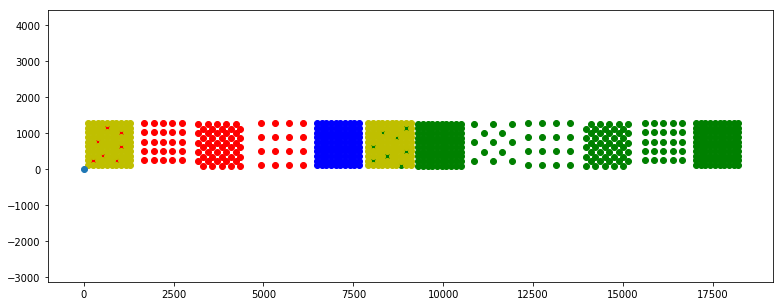

In [9]:
fileslist = []
fileslist.append(r'C:\Users\omersha\Dropbox (Weizmann)\omer_spotter\rev5_all\blue_missing\2d_rev5_all_cross_talk_t7_k4.csv')
f,ax = plt.subplots(1,1,figsize=(13,5))
for file in fileslist:
    out_file_name = file
    print ('writing to file: '+ out_file_name)
    writefile(file,out_file_name)
